In [1]:
import sctt as st
import scanpy as sc
import matplotlib as mpl

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
pip install anndata --upgrade

  Using cached anndata-0.8.0-py3-none-any.whl (96 kB)
  Attempting uninstall: anndata
    Found existing installation: anndata 0.7.5
    Uninstalling anndata-0.7.5:
      Successfully uninstalled anndata-0.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dynamo-release 1.2.0 requires openpyxl, which is not installed.
dynamo-release 1.2.0 requires python-igraph>=0.7.1, which is not installed.
dynamo-release 1.2.0 requires anndata==0.7.5, but you have anndata 0.8.0 which is incompatible.
dynamo-release 1.2.0 requires numba>=0.54.0, but you have numba 0.52.0 which is incompatible.
dynamo-release 1.2.0 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
adata = sc.read_h5ad('../data/toggle_switch/data_toggle.h5ad')
adata.obs['attractor']=adata.obs['leiden']

In [4]:
import scvelo as scv
scv.pp.moments(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
adata_aggr = st.dynamical_iteration(adata,n_states =2, n_iter = 10, n_neighbors = 100,return_aggr_obj=True, weight_connectivities = 0.2, n_components = 21)

  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=13113, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
nan


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=37373, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.10894740215613528


  0%|          | 0/10010 [00:00<?, ?cell/s]

  0%|          | 0/10010 [00:00<?, ?cell/s]

((0.8 * <VelocityKernel[softmax_scale=1.07, mode=deterministic, seed=45423, scheme=<DotProductScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))
0.06516921791633176


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/sctt.py:335: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


In [6]:
import scvelo as scv
sc.tl.pca(adata_aggr, svd_solver='arpack')

In [7]:
adata_aggr.obs['rho_1']= adata.uns['da_out']['membership'][:,1]
adata_aggr.obs['attractor'] = adata.obs['attractor']
adata_aggr.obs['leiden'] = adata.obs['leiden']

In [8]:
sc.set_figure_params(dpi=600,fontsize = 18)
sc.pl.embedding(adata_aggr,color = ['leiden','attractor','speed','entropy'],basis = 'pca')

In [9]:
scv.tl.velocity_graph(adata_aggr)

computing velocity graph (using 1/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


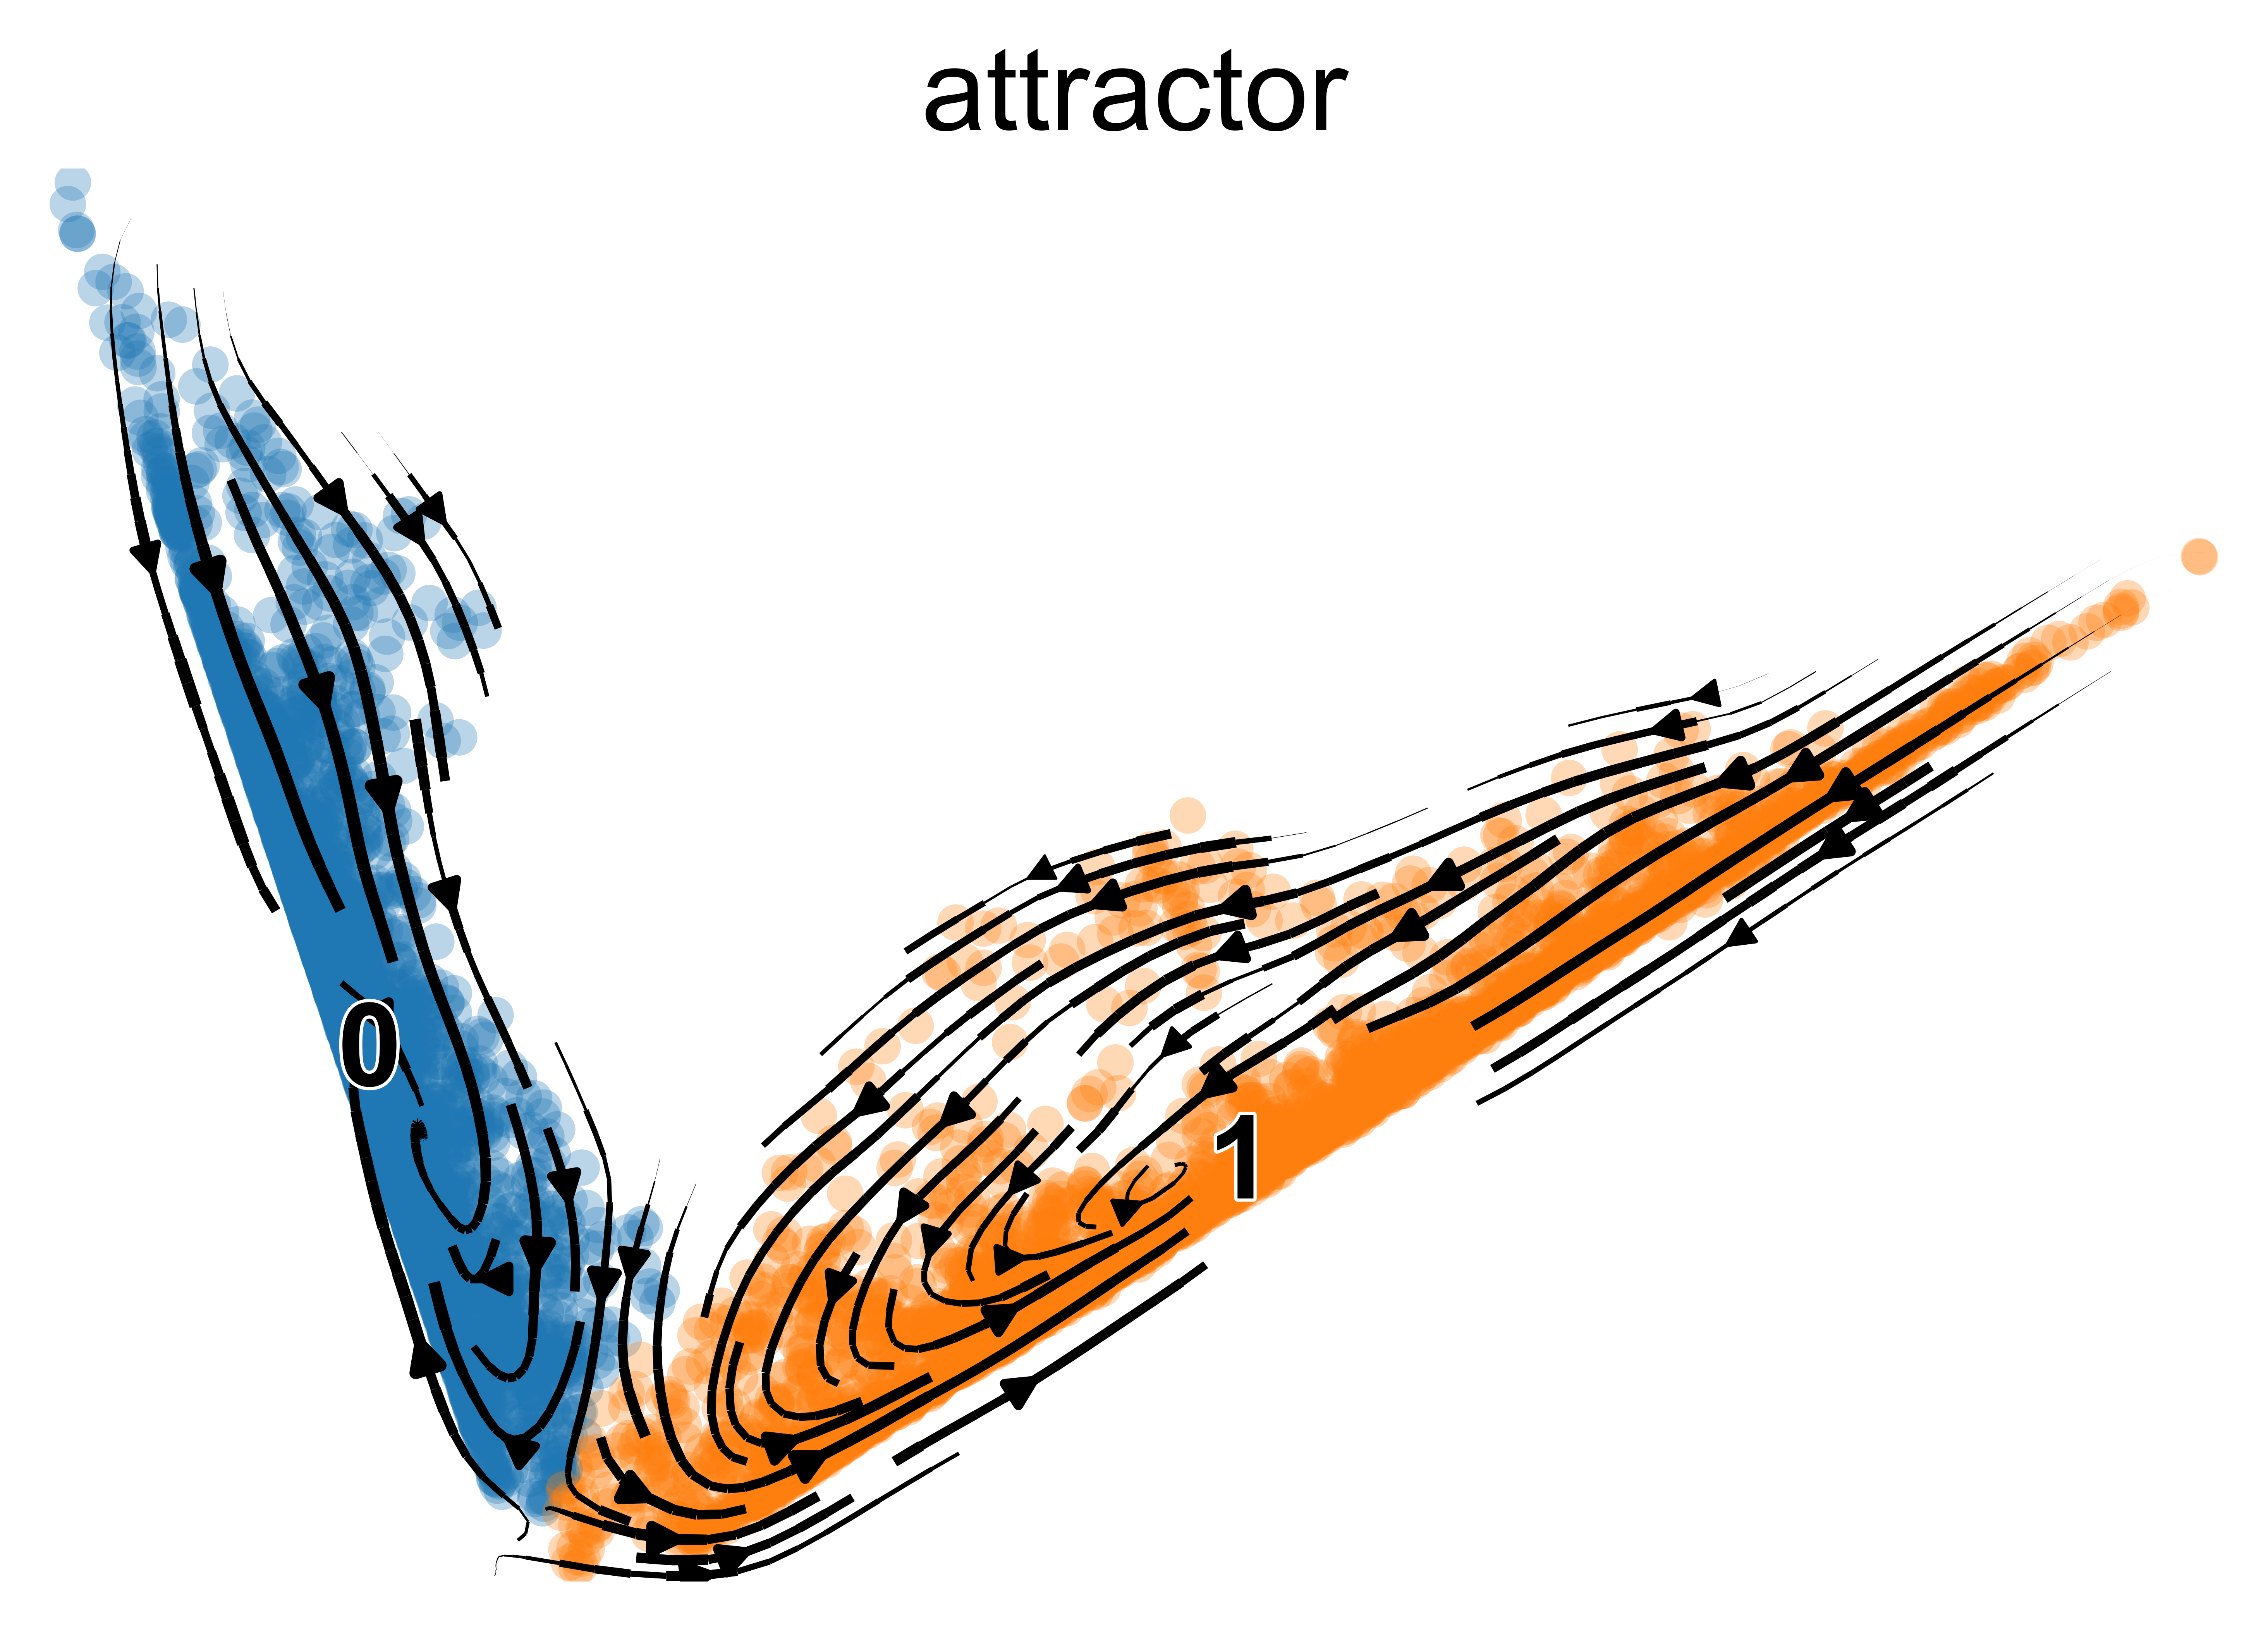

In [10]:
scv.set_figure_params(dpi =600,fontsize = 18)
scv.pl.velocity_embedding_stream(adata_aggr, basis='pca', color='attractor')

In [11]:
#import numpy as np
#np.save('../data/toggle_switch/toggle_pca.npy',adata_aggr.obsm['X_pca'])

View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:41) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:46) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
check that the input includes aggregated object
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:47) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vj_pca', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vs_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vs_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)
View of AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'attractor', 'entropy', 'speed'
    var: 'highly_variable', 'r2'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'da_out', 'par', 'gene_subset'
    obsm: 'X_coord', 'coord', 'tensor_v', 'tensor_v_aver', 'rho', 'X_pca_aggr'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velo'
    obsp: 'connectivities', 'distances'
computing velocity graph (using 8/8 cores)


  0%|          | 0/10010 [00:00<?, ?cells/s]

/Users/cliffzhou/opt/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:10) --> added 
    'vu_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'vu_pca_aggr', embedded velocity vectors (adata.obsm)


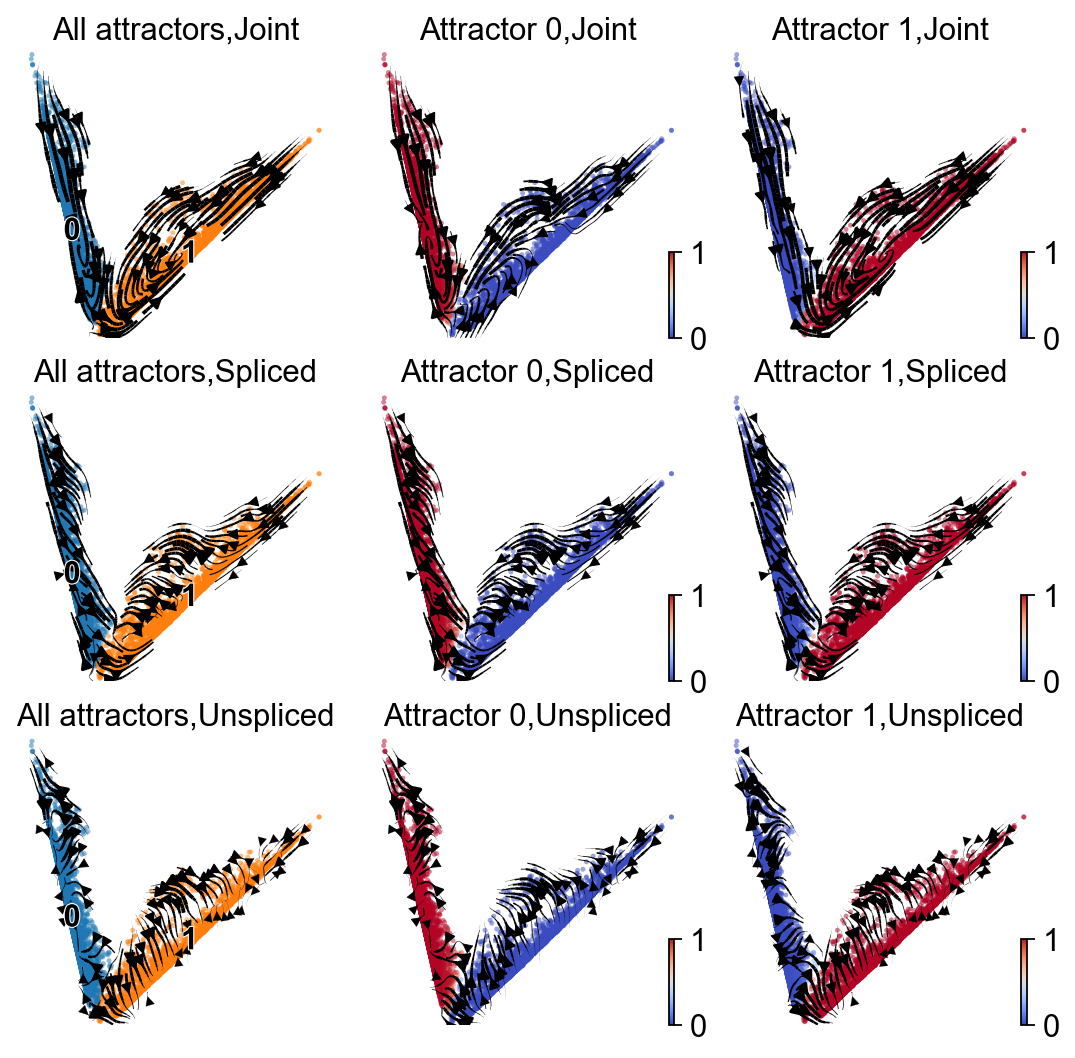

In [11]:
sc.set_figure_params(fontsize = 14)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
adata.obsm['X_pca_aggr']=adata_aggr.obsm['X_pca']
st.plot_tensor(adata, adata_aggr,  basis = 'pca')